<a href="https://colab.research.google.com/github/WisdomVoyager/Python_Project/blob/main/Simple__Project_911.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CALL CENTER 911 EDA

This data set of 911 is of Pennsylvania State of USA.

The Data contains the following field
lat : String variable, Latitude

lng: String variable, Longitude

desc: String variable, Description of the Emergency Call

zip: String variable, Zipcode

title: String variable, Title

timeStamp: String variable, YYYY-MM-DD HH:MM:SS

twp: String variable, Township

addr: String variable, Address

e: String variable, Dummy variable (always 1)

# Data and Setup

### Import Numpy, Pandas, Matplotlib and Seaborn libraries for Data Analysis and Data Vizualisation.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read in the csv file as a dataframe called df

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset/911.csv')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Exploring the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


### What are the top 5 zipcodes for 911 calls?

In [ ]:
#what are those pincodes where we get most calls from
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

What are the top 5 townships (twp) for 911 calls?

In [ ]:
# townships with most calls
df['twp'].value_counts().head(5)


LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

### In the 'title' column, how many distinct title codes can be found?

In [ ]:
#what are the reasons people are calling for?

In [ ]:
df['title'].nunique()

110

In [ ]:
df['title']

0             EMS: BACK PAINS/INJURY
1            EMS: DIABETIC EMERGENCY
2                Fire: GAS-ODOR/LEAK
3             EMS: CARDIAC EMERGENCY
4                     EMS: DIZZINESS
                    ...             
99487    Traffic: VEHICLE ACCIDENT -
99488    Traffic: VEHICLE ACCIDENT -
99489               EMS: FALL VICTIM
99490           EMS: NAUSEA/VOMITING
99491    Traffic: VEHICLE ACCIDENT -
Name: title, Length: 99492, dtype: object

### A new column called "Reason" will be generated by applying a custom lambda expression to the existing "Titles" column. The lambda expression will extract and store the "Reasons" mentioned before the title code, which typically include EMS, Fire, and Traffic, thereby providing meaningful context to the data.

In [ ]:
#most titles have prefix and suffix
#data cleaning of title column using lambda function to acess first part of the reason
df['reason']=df['title'].apply(lambda title: title.split (':')[0])
df['reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: reason, Length: 99492, dtype: object

### What stands out as the most frequently occurring reason for these 911 calls? Its total occurance and in terms of percentage so that we can plot it using Seaborn

In [ ]:
# Now to find unique reasons for calling
df['reason'].unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)

In [ ]:
df['reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

In [ ]:
# to get percentage value of the above
df['reason'].value_counts(normalize=True)

EMS        0.491266
Traffic    0.358773
Fire       0.149962
Name: reason, dtype: float64

<Axes: xlabel='reason', ylabel='count'>

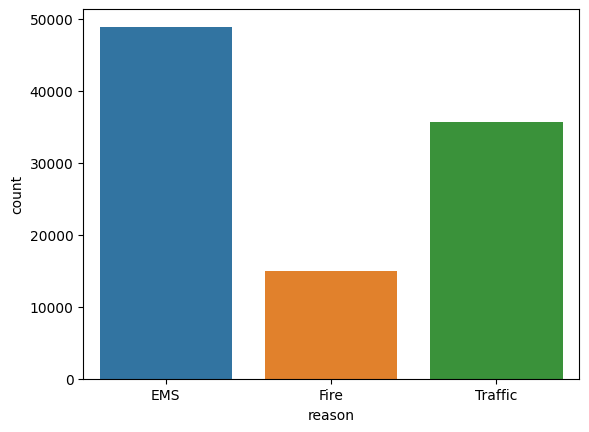

In [ ]:
#To visualize the reason for calling
sns.countplot(x='reason', data=df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
 9   reason     99492 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 7.6+ MB


### Using timestamp column to find out time related information about calls for staff planning

In [ ]:
# we will use timestamp function next to find out which times we need more staff
df['timeStamp']

0        2015-12-10 17:40:00
1        2015-12-10 17:40:00
2        2015-12-10 17:40:00
3        2015-12-10 17:40:01
4        2015-12-10 17:40:01
                ...         
99487    2016-08-24 11:06:00
99488    2016-08-24 11:07:02
99489    2016-08-24 11:12:00
99490    2016-08-24 11:17:01
99491    2016-08-24 11:17:02
Name: timeStamp, Length: 99492, dtype: object

###Timestamps are still strings. Used pd.to_datetime to convert the column from strings to DateTime objects.

In [ ]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])
df['timeStamp']

0       2015-12-10 17:40:00
1       2015-12-10 17:40:00
2       2015-12-10 17:40:00
3       2015-12-10 17:40:01
4       2015-12-10 17:40:01
                ...        
99487   2016-08-24 11:06:00
99488   2016-08-24 11:07:02
99489   2016-08-24 11:12:00
99490   2016-08-24 11:17:01
99491   2016-08-24 11:17:02
Name: timeStamp, Length: 99492, dtype: datetime64[ns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   lat        99492 non-null  float64       
 1   lng        99492 non-null  float64       
 2   desc       99492 non-null  object        
 3   zip        86637 non-null  float64       
 4   title      99492 non-null  object        
 5   timeStamp  99492 non-null  datetime64[ns]
 6   twp        99449 non-null  object        
 7   addr       98973 non-null  object        
 8   e          99492 non-null  int64         
 9   reason     99492 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 7.6+ MB


### Utilizing the DateTime objects in the timestamp column, employ .apply() to generate three additional columns: Hour, Month, and Day of Week, each capturing the corresponding time-related information.

In [ ]:
# Separating date, hour and month
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   lat          99492 non-null  float64       
 1   lng          99492 non-null  float64       
 2   desc         99492 non-null  object        
 3   zip          86637 non-null  float64       
 4   title        99492 non-null  object        
 5   timeStamp    99492 non-null  datetime64[ns]
 6   twp          99449 non-null  object        
 7   addr         98973 non-null  object        
 8   e            99492 non-null  int64         
 9   reason       99492 non-null  object        
 10  Hour         99492 non-null  int64         
 11  Month        99492 non-null  int64         
 12  Day of Week  99492 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(5)
memory usage: 9.9+ MB


In [ ]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


### In order to replace the integer values 0-6 in the "Day of Week" column with their corresponding string names (e.g., "Monday" for 0, "Tuesday" for 1, etc.), the .map() function can be utilized along with a predefined dictionary. This operation aims to enhance the readability and interpretability of the dataset.
### dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
### We are going to use above dictionary to replace numbers in day of week into names through mapping.

In [ ]:
df['Day of Week'].unique()

array([3, 4, 5, 6, 0, 1, 2])

In [ ]:
#mapping
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [ ]:
df['Day of Week'] = df['Day of Week'].map(dmap)
df['Day of Week']

0        Thu
1        Thu
2        Thu
3        Thu
4        Thu
        ... 
99487    Wed
99488    Wed
99489    Wed
99490    Wed
99491    Wed
Name: Day of Week, Length: 99492, dtype: object

In [ ]:
df['Day of Week'].unique()

array(['Thu', 'Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed'], dtype=object)

### What is the resons of calls coming in for what time of the day? Used seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.

<Axes: xlabel='Day of Week', ylabel='count'>

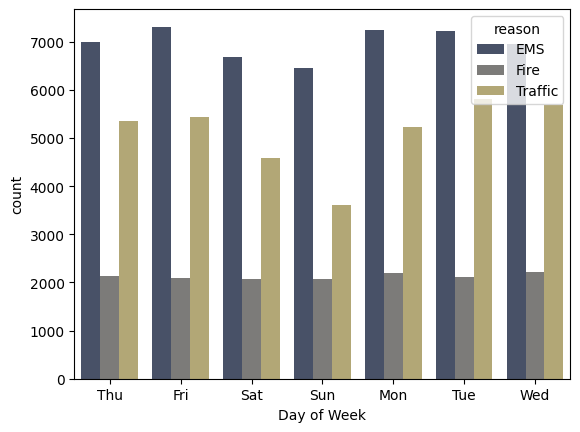

In [ ]:
# what is the resons of calls coming in for what time of the day
sns.countplot(x='Day of Week', data=df, hue='reason', palette ='cividis')

### Similarly,What is the resons of calls coming in for in month level?

<Axes: xlabel='Month', ylabel='count'>

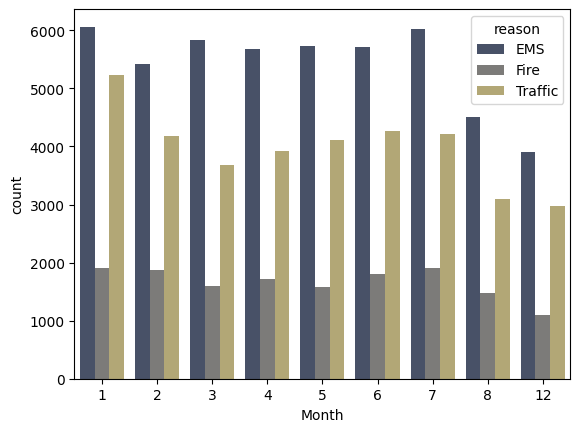

In [ ]:
# what is the resons of calls coming in for in month level
sns.countplot(x='Month', data=df, hue='reason', palette ='cividis')

### We can see that some months data are missing- sep, oct, nov.
To fill in the missing months and visualize the data using a line plot, we first created a groupby object called "byMonth" by grouping the DataFrame based on the "month" column. We then applied the count() method to aggregate the data by month. Finally, we used the head() method on the resulting DataFrame to display the top few rows, revealing the information about the occurrence of incidents for each month.


In [ ]:
df.groupby('Month').count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


Its seen tha from after january there is a trend of decline in number of calls made and its very low in december.

Storing the above count in a variable

In [ ]:
# storing the above count in a variable
byMonth = df.groupby('Month').count()

### Generated a basic plot from the DataFrame showing the call count per month, illustrating the monthly incident trends.

<Axes: xlabel='Month'>

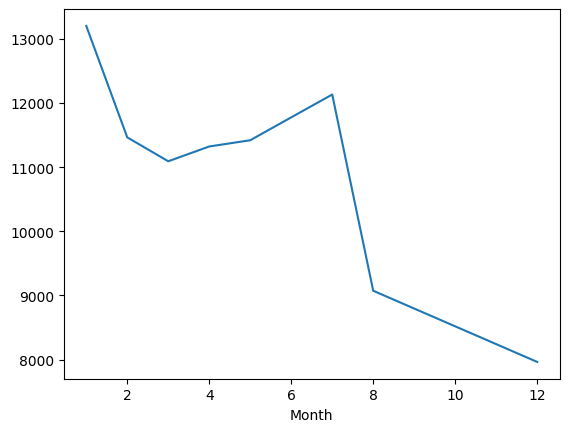

In [ ]:
byMonth['twp'].plot()

Utilized seaborn's lmplot() function to create a linear fit on the number of calls per month, while also considering the need to reset the index to a column for proper plotting.

The .reset_index() method in pandas is used to reset the index of a DataFrame or Series to the default integer-based index. When you perform groupby operations in pandas, the resulting DataFrame is often presented with a hierarchical index, where the columns used for grouping become part of the index.

Resetting the index with .reset_index() helps in converting the "month" column back to a regular column, making it easier to work with and plot the data.

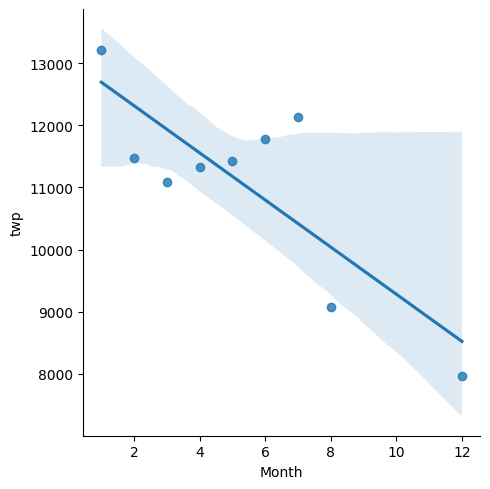

In [ ]:
sns.lmplot(x="Month",y="twp",data=byMonth.reset_index())
#The reset_index() method is used to convert any indices(groupby view) into regular columns, allowing them to be used as variables for plotting.

In [ ]:
#Linear regression plot to see its trend and confidence interval

###The heatmap of days of a week and hours
We needed to find out on a daily basis for capacity of staff needed(time based seasonality on day level)

To create heatmaps with seaborn and the provided data, we first needed to restructure the dataframe by combining groupby operations with the unstack method. This was done by grouping the data by "Day of the Week" and "Hours," and then unstacking the "Hours" to become columns while setting the "Day of the Week" as the index.

This restructuring enabled us to visualize the data effectively using seaborn's heatmap function, revealing patterns of incidents based on the day and hour of occurrence.

In [ ]:
dayHour = df.groupby (by=['Day of Week','Hour']).count()['reason'].unstack()
# unstack -This method reshapes the Series into a DataFrame by unstacking the index.

In [ ]:
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


Now created a HeatMap using this new DataFrame.

### A clustermap was created using the restructured DataFrame.

By employing seaborn's clustermap function, the data was clustered based on similarities in incident occurrences across different days and hours. This visualization allowed us to identify patterns and groupings in the data, providing valuable insights into the temporal distribution of incidents.

<Axes: xlabel='Hour', ylabel='Day of Week'>

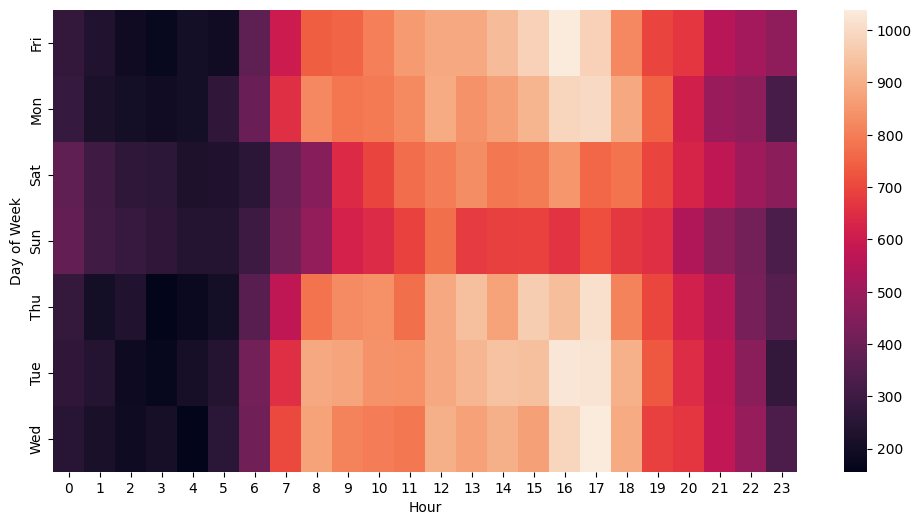

In [ ]:
plt.figure(figsize =(12,6))
sns.heatmap(dayHour)

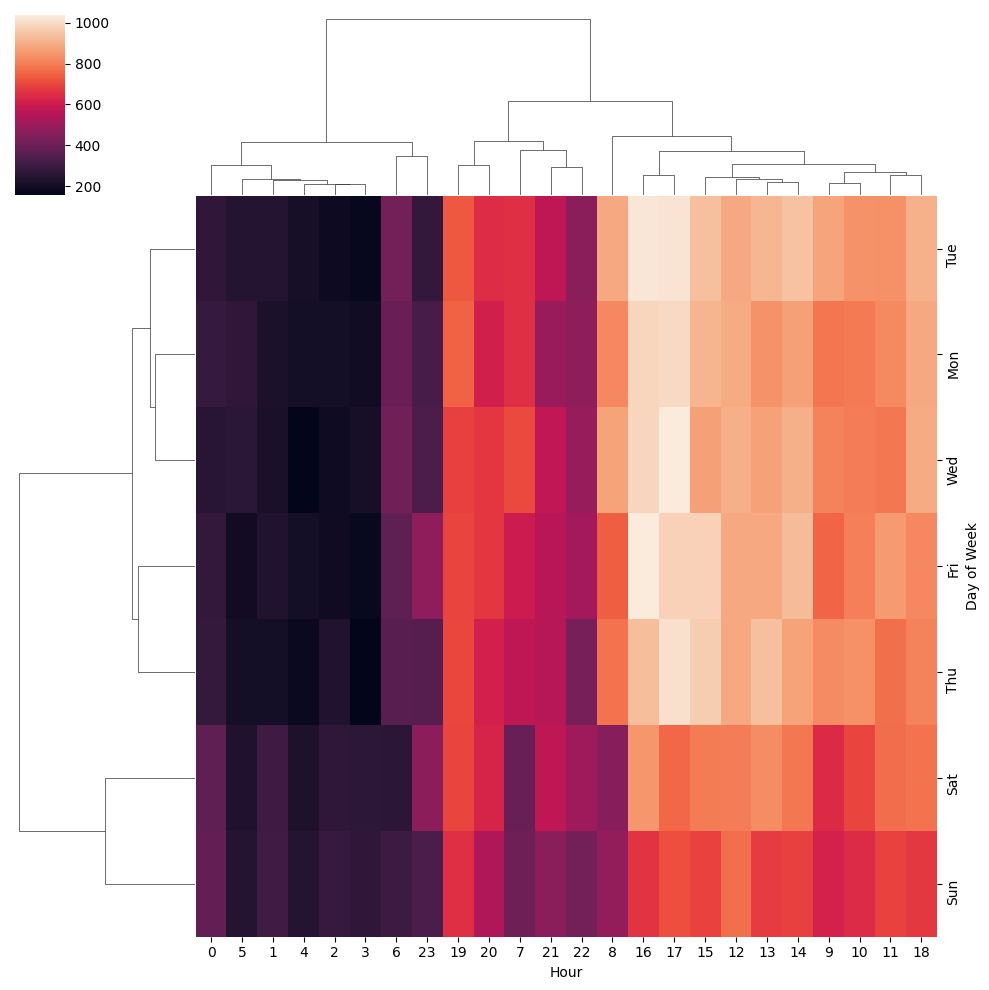

In [ ]:
#24 hr view of calls coming in. Lighter the colors are more the calls are coming in during that duration.
#survivorship bias
sns.clustermap(dayHour)